# Data Visualization in Python

## Content

1. [Overview](#Overview)
1. [Python packages](#Required-Python-packages)
1. [Plotting](#Plotting)
    1. [Exemplary data](#Exemplary-data)
    1. [X–Y plots](#X-Y-scatter-and-line-plots)
    1. [Subplots](#Subplots)
    1. [Probability distributions](#Probability-distributions)


---
## Overview

Plotting data with Python can be accomplished in many different ways.
The foundational plotting functionality is provided by [`matplotlib`](https://matplotlib.org/stable/tutorials/pyplot.html) with numerous other packages building on top of it for enhanced ease-of-use.
A useful one is [`seaborn`](https://seaborn.pydata.org/), but a more comprehensive comparison of polular options can be found in 
[this article](https://towardsdatascience.com/top-6-python-libraries-for-visualization-which-one-to-use-fe43381cd658).


We will demonstrate how to generate some basic plotting types with [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) and [Seaborn](https://seaborn.pydata.org/) in the following.
Choose the option that best suits your style.

---
## Required Python packages

Before using Python for data processing and visualization, some required packages need to be imported.

* [Matplotlib](https://matplotlib.org) as base-level plotting engine
* [Seaborn](https://seaborn.pydata.org) for high-level access to plotting functionality
* [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) for dealing with spreadsheet-like data
* [NumPy](https://numpy.org) for performing calculations on data arrays

Note that we provide (the typical) shorthand names for each of these modules with the `as alias` modifier!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['text.usetex'] = True

Each of the above packages provides an assortment of functions (called "methods") that can be accessed as `module.method()`.
For example, `numpy` provides math functions such as `np.sqrt()` or `np.cos()`, which will calculate the square root and cosine of their argument, respectively.

Similarly, a module can contain variables that control the overall behavior.
For example, `plt.rcParams` is a dictionary of runtime configuration properties that determine the look and feel of Matplotlib.
Here, we want to use typesetting based on $\LaTeX$ and turn this feature on by setting the key `text.usetex` to `True`.

---
## Plotting

### Exemplary data

A force–displacement time series found in the "Data" folder serves as an example for subsequent plotting.

In [2]:
df = pd.read_csv('../Data/force-displacement.csv',
                 skiprows=7,
                 usecols=[1,2,3],
                 names=['Time/s','Displacement/mm','Force/N'],
                )


In [3]:
df.head(n=3)          # Display the first 3 rows of the data frame

,Time/s,Displacement/mm,Force/N
0,0.0,0.0000,39.3799
1,0.1,0.0042,43.7967
2,0.2,0.0175,45.0747


For later use, let us define shorthand names for two data series that we will be frequently using...

In [4]:
displ = df['Displacement/mm']
force = df['Force/N']

... and a basic set of colors. (How colors can be specified is explained in [this guide](https://matplotlib.org/stable/users/explain/colors/colors.html).)

In [5]:
myOrange = '#FFA500'   # orange (in hexadecimal RGB)
myGreen = '#00a00030'  # a semitransparent shade of green (in hexadecimal RGBA)

### X-Y scatter and line plots

####  Matplotlib

The command to draw a line graph or scatter plot is `plt.plot()`, and it comes with a lot of options for adjusting the drawing style.
For more details, please see the [pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html).

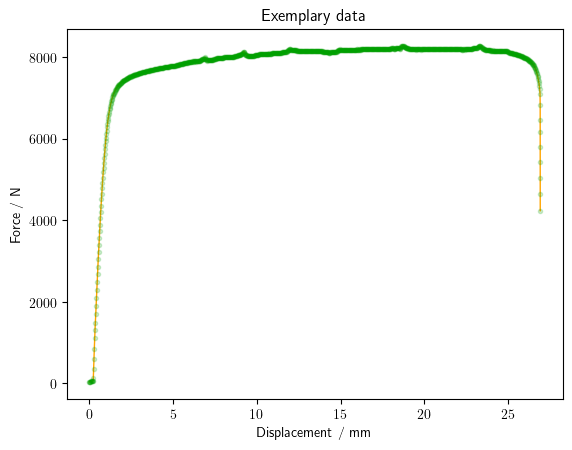

In [6]:
plt.plot(displ,
         force,
         linestyle='-', color=myOrange, linewidth=1,
         marker='.', markerfacecolor=myGreen, markeredgecolor=myGreen)

plt.title('Exemplary data')
plt.xlabel('Displacement / mm')
plt.ylabel('Force / N')
plt.show()                 # show graph

#### Seaborn

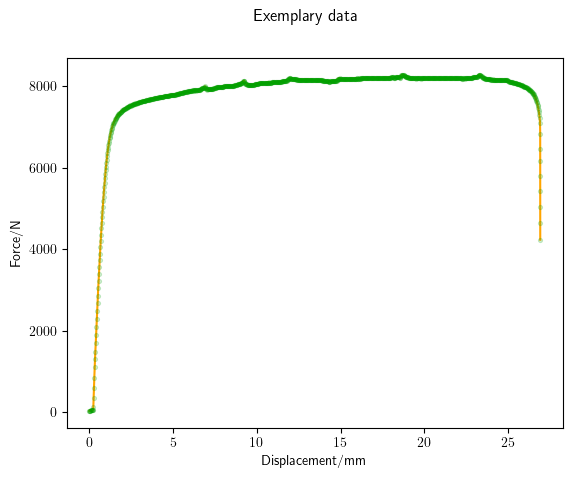

In [7]:
fig,ax = plt.subplots()
fig.suptitle('Exemplary data')
sns.lineplot(data=df,
             x='Displacement/mm',
             y='Force/N',
             color=myOrange,
             marker='.',
             markerfacecolor=myGreen,
             markeredgecolor=myGreen,
            )
plt.show()

### Subplots

Subplots are a tabular arrangement of individual plots that frequently share one or both axes to offer an easy way to compare multiple aspects of an underlying dataset.

We create a 2 by 2 grid of plots in below examples.

#### Matplotlib

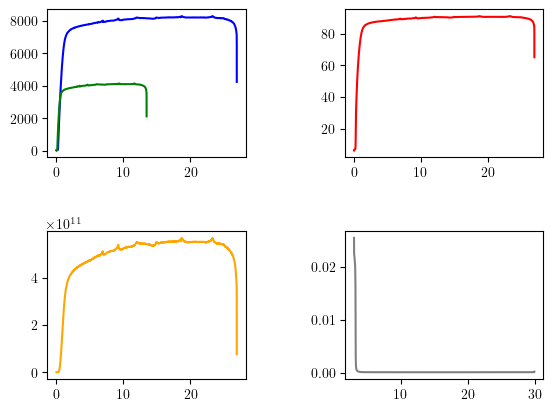

In [8]:
# The first subplot contains two curves:
# force versus displacement and a scaled version of these
plt.subplot(2, 2, 1)  # (number of rows, number of columns, subplot number)
plt.plot(displ,
         force,
         color='blue')
plt.plot(0.5 * displ,
         0.5 * force,
         color='green')

# The second subplot contains the square root of force versus displacement
plt.subplot(2, 2, 2)
plt.plot(displ,
         np.sqrt(force),
         color='red')

# The third subplot contains force raised to the cube versus displacement
plt.subplot(2, 2, 3)
plt.plot(displ,
         np.power(force,3),   # np.power is used to calculate nth power, here raised to the cube
         color='orange')

# The fourth subplot contains inverse force versus displacement shifted by 10 mm
plt.subplot(2, 2, 4)
plt.plot(3 + displ,
         1 / force,
         color='gray')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#### Seaborn

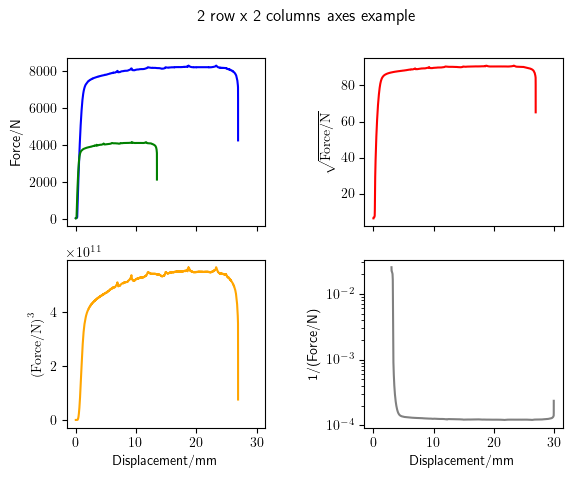

In [9]:
fig,axes = plt.subplots(2, 2, sharex=True)    # generates a 2 by 2 array of "axes" to hold our plots
fig.suptitle('2 row x 2 columns axes example')

sns.lineplot(ax=axes[0, 0], data=df, x='Displacement/mm', y='Force/N', color='blue')  # use keys of the data frame
sns.lineplot(ax=axes[0, 0], x=0.5*displ, y=0.5*force, color='green')                             # or directly specify the data
sns.lineplot(ax=axes[0, 1], x=displ, y=np.sqrt(force), color='red')
sns.lineplot(ax=axes[1, 0], x=displ, y=np.power(force,3), color='orange')
sns.lineplot(ax=axes[1, 1], x=3+displ, y=1/force, color='gray',)

axes[0,1].set_ylabel(r'$\sqrt{\mathrm{Force/N}}$')
axes[1,0].set_ylabel(r'$\mathrm{(Force/N)}^3$')
axes[1,1].set_ylabel('1/(Force/N)')
axes[1,1].set_yscale('log')

plt.subplots_adjust(wspace=0.5, hspace=0.2)    # adjust the spacing between plots
plt.show()

### Probability distributions

#### Seaborn

Seaborn offers a number of ways to illustrate the statistics of a population of data.
Below, the three most commonly used ones are demonstrated.
If in doubt, the "empirical cumulative distribution function" (ecdf) is generally the most useful one as it does not depend on an (arbitrary) binning choice and, hence, does truly and holistically reflect the entirety of your data.

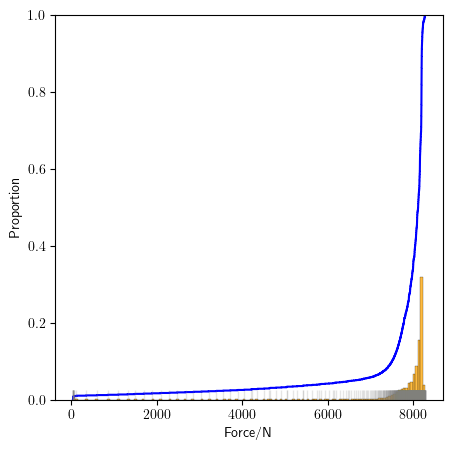

In [10]:
fig,ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(data=df,x='Force/N',stat='proportion',ax=ax,color='blue')           # data specified as dataframe and keys
sns.histplot(data=df,x='Force/N',stat='proportion',ax=ax,color='orange')
sns.rugplot (        x=force,                      ax=ax,color='gray',alpha=0.2) # data specified directly as array/series
plt.show()

#### Matplotlib

The command for plotting a histogram is `plt.hist()`.
The number of bins can be specified (as is done below) or left to be automatically chosen.

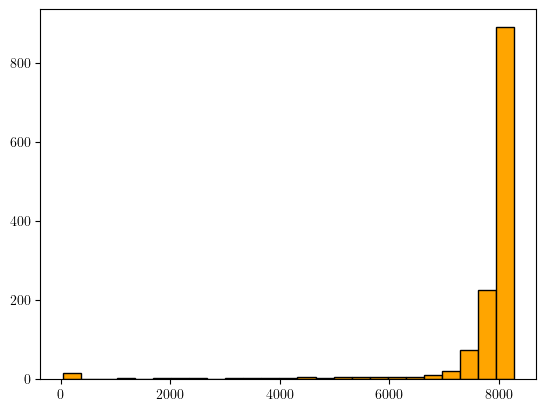

In [12]:
plt.hist(force, bins=25,
         edgecolor='black',
         facecolor='orange',
        )

plt.show()

It is possible to have non-equal bins by customizing the bin edges.

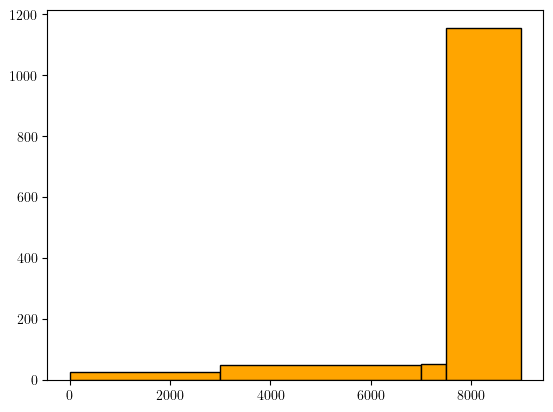

In [16]:
edges = 1e3*np.array([0, 3, 7, 7.5, 9])
plt.hist(force, bins=edges,
         edgecolor='black',
         facecolor='orange',
        )

plt.show()